In [49]:
import numpy as np
import matplotlib.pyplot as plt
from cv2 import *
from skimage import io
from PIL import *
im1 = io.imread('Preto-ht.png')
im2 = io.imread('tower-ht.png')
image3 = io.imread('halftone.png')
image1 = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)

(384L, 512L)


Text(0.5,1,'Fourier transform')

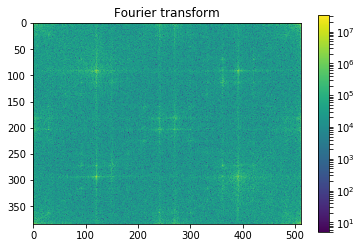

In [54]:
from scipy import fftpack
im_fft = fftpack.fft2(image1)
print im_fft.shape

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')


In [55]:
def filter(fft):
    filter = np.copy(fft)
    filter[:,:] = 1e-3
    filter[175:225,225:275] = 0.8
    int1 = 50
    int2 = 350
    int3 = 450
    filter[:int1,:int1] = 1.0
    filter[:int1,int3:] = 1.0
    filter[int2:,:int1] = 1.0
    filter[int2:,int3:] = 1.0
    return filter
def filter2(fft):
    w,h = fft.shape[0],fft.shape[1]
    filter = np.copy(fft)
    val1 = 0
    val2 = 1
    filter[:,:] = val1

    filter[:100,:100] = val2
    filter[:100,400:] = val2
    filter[275:,:100] = val2
    filter[275:,400:] = val2
    return filter

Text(0.5,1,'Reconstructed Image')

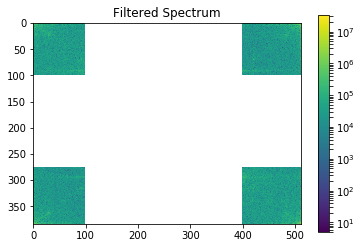

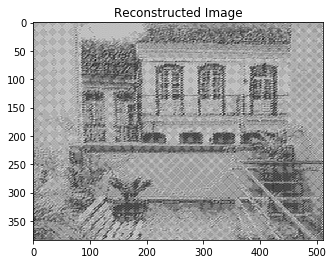

In [56]:
keep_fraction = 0.15
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2 *= filter2(im_fft2)
plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')
im_new = fftpack.ifft2(im_fft2).real
plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')
# plt.savefig('ss.png')

In [53]:
import scipy.misc
scipy.misc.imsave('tower_unht.jpg', im_new)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
